In [1]:
import opendatasets as od

In [2]:
od.download("https://www.kaggle.com/datasets/lucafrance/oktoberfest")

100%|█████████████████████████████████████████████████████████████████████████████████| 871/871 [00:00<00:00, 9.69kB/s]

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv("oktoberfest.csv")
data.head()

,year,duration,guests_total,guests_daily,beer_price,beer_consumption,roast_chicken_price,roast_chicken_consumption
0,1985,16,7.1,444,3.20,54541,4.77,629520
1,1986,16,6.7,419,3.30,53807,3.92,698137
2,1987,16,6.5,406,3.37,51842,3.98,732859
3,1988,16,5.7,356,3.45,50951,4.19,720139
4,1989,16,6.2,388,3.60,51241,4.22,775674


In [4]:
data.tail()

,year,duration,guests_total,guests_daily,beer_price,beer_consumption,roast_chicken_price,roast_chicken_consumption
30,2015,16,5.9,369,10.27,75134,10.75,503510
31,2016,17,5.6,329,10.57,66231,11.00,366876
32,2017,18,6.2,344,10.87,77836,11.41,466747
33,2018,16,6.3,394,11.30,78705,11.67,436492
34,2019,16,6.3,394,11.71,78502,12.15,434998


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       35 non-null     int64  
 1   duration                   35 non-null     int64  
 2   guests_total               35 non-null     float64
 3   guests_daily               35 non-null     int64  
 4   beer_price                 35 non-null     float64
 5   beer_consumption           35 non-null     int64  
 6   roast_chicken_price        35 non-null     float64
 7   roast_chicken_consumption  35 non-null     int64  
dtypes: float64(3), int64(5)
memory usage: 2.3 KB


In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

year                         0
duration                     0
guests_total                 0
guests_daily                 0
beer_price                   0
beer_consumption             0
roast_chicken_price          0
roast_chicken_consumption    0
dtype: int64

### Investigating the beer and chicken consumption over the years:

In [8]:
years = data.groupby('year')[['beer_consumption','roast_chicken_consumption']].sum().reset_index()

In [9]:
years.head()

,year,beer_consumption,roast_chicken_consumption
0,1985,54541,629520
1,1986,53807,698137
2,1987,51842,732859
3,1988,50951,720139
4,1989,51241,775674


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

years[['beer_consumption', 'roast_chicken_consumption']] = scaler.fit_transform(years[['beer_consumption', 
                                                                                       'roast_chicken_consumption']])
years.head()

,year,beer_consumption,roast_chicken_consumption
0,1985,-0.761963,0.472739
1,1986,-0.834763,1.035905
2,1987,-1.029658,1.320881
3,1988,-1.118030,1.216483
4,1989,-1.089267,1.672280


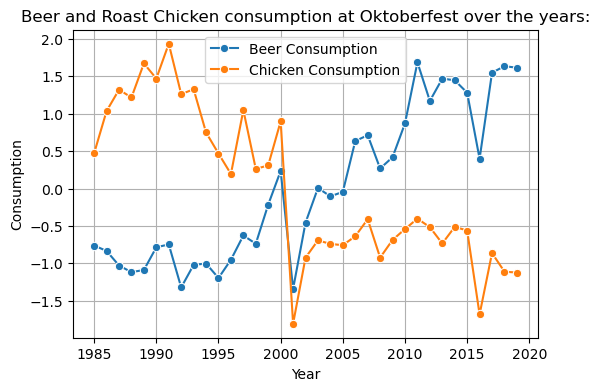

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))

sns.lineplot(years, x='year', y='beer_consumption', label='Beer Consumption', marker='o')
sns.lineplot(years, x='year', y='roast_chicken_consumption', label='Chicken Consumption', marker='o')

plt.title("Beer and Roast Chicken consumption at Oktoberfest over the years:")
plt.xlabel("Year")
plt.ylabel("Consumption")
plt.grid(True)
plt.legend()

### Investigating the beer and chicken prices over the years:

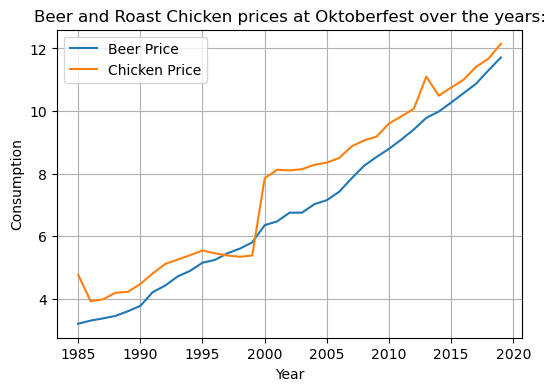

In [12]:
plt.figure(figsize=(6,4))

sns.lineplot(data, x=data['year'], y=data['beer_price'], label='Beer Price')
sns.lineplot(data, x=data['year'], y=data['roast_chicken_price'], label='Chicken Price')

plt.title("Beer and Roast Chicken prices at Oktoberfest over the years:")
plt.xlabel("Year")
plt.ylabel("Consumption")
plt.grid(True)
plt.legend()

### Investigating the liters of beers consumed per person yearly:

In [13]:
data_mod = data.copy()

In [14]:
data_mod['beer_in_liters'] = data_mod['beer_consumption'] * 100 # Converting hectoliters to liters
data_mod['pop'] = data['guests_total'] *1000000 # COnverting the population in millions

In [15]:
data_mod['beer_per_person'] = data_mod['beer_in_liters'] / data_mod['pop']
data_mod.head()

,year,duration,guests_total,guests_daily,beer_price,beer_consumption,roast_chicken_price,roast_chicken_consumption,beer_in_liters,pop,beer_per_person
0,1985,16,7.1,444,3.20,54541,4.77,629520,5454100,7100000.0,0.768183
1,1986,16,6.7,419,3.30,53807,3.92,698137,5380700,6700000.0,0.803090
2,1987,16,6.5,406,3.37,51842,3.98,732859,5184200,6500000.0,0.797569
3,1988,16,5.7,356,3.45,50951,4.19,720139,5095100,5700000.0,0.893877
4,1989,16,6.2,388,3.60,51241,4.22,775674,5124100,6200000.0,0.826468


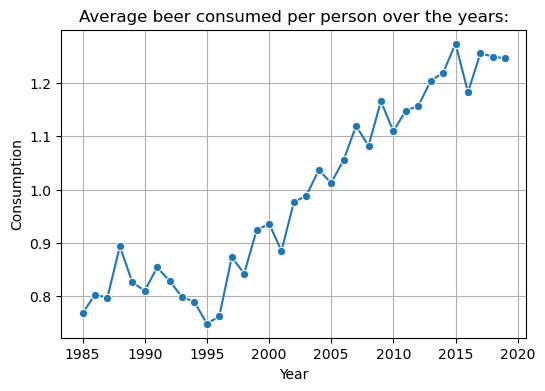

In [16]:
plt.figure(figsize=(6,4))

sns.lineplot(data_mod, x=data_mod['year'], y=data_mod['beer_per_person'], marker='o')

plt.title("Average beer consumed per person over the years:")
plt.xlabel("Year")
plt.ylabel("Consumption")
plt.grid(True)

### Investigating the total money spent on food:

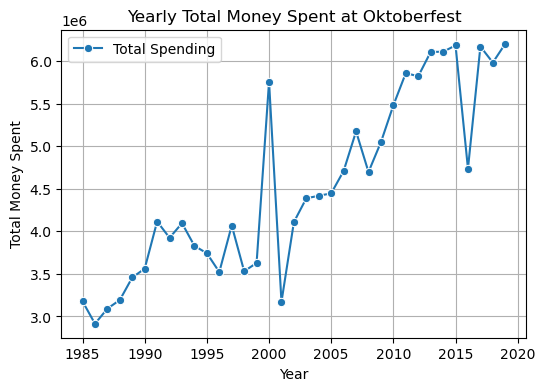

In [17]:
data_mod['total_money_spent'] = data_mod['beer_consumption'] * data_mod['beer_price'] + data_mod['roast_chicken_consumption'] * data_mod['roast_chicken_price']

yearly_spending = data_mod.groupby('year')['total_money_spent'].sum().reset_index()

plt.figure(figsize=(6, 4))

sns.lineplot(yearly_spending, x='year', y='total_money_spent', label='Total Spending', marker='o')
plt.title('Yearly Total Money Spent at Oktoberfest')
plt.xlabel('Year')
plt.ylabel('Total Money Spent')
plt.legend()
plt.grid(True)

### Investigating the correlation of beer and chicken consumption with their respective prices:

In [18]:
data.columns

Index(['year', 'duration', 'guests_total', 'guests_daily', 'beer_price',
       'beer_consumption', 'roast_chicken_price', 'roast_chicken_consumption'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Plot of Beer and Chicken Consumption with Prices')

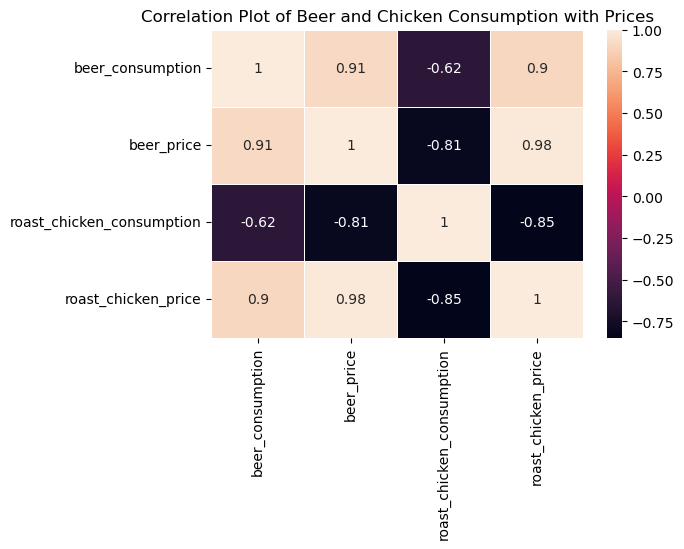

In [19]:
correlations = data[['beer_consumption', 'beer_price', 'roast_chicken_consumption', 'roast_chicken_price']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(correlations, annot=True, linewidths=.5)
plt.title('Correlation Plot of Beer and Chicken Consumption with Prices')

### Developing a linear regression model to:
- Predict how many visitors are expected to come to for the year 2023
- Predict how much beer will be consumed in 2023
- Predict how much roast chickens will be eaten in 2023
- Calculating the price elasticity of beer and chicken

#### 1. Predicting the number of guests expected to visit in the year 2023

In [20]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# data.head()

X = data[["year"]]
y = data["guests_total"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

year_2023 = np.array([[2023]])
visitors_2023 = model.predict(year_2023)

print(f"Predicted number of visitors in 2023: {visitors_2023[0]:.2f}M")

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Predicted number of visitors in 2023: 6.01M
Mean Squared Error (MSE): 0.20
R-squared (R2): -0.09


From the obtained evaluation metrics it can is evident that, with low MSE value, on average, the predicted value is close to the actual values. However the negative R2 score indicates that the modelis performing poorly and is failing to capture the variance and the underlying patterns

#### 2. Predicting the quantity of beer consumption that is expected in the year 2023

In [21]:
X = data[['year', 'guests_total']]
y = data[['beer_consumption']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

model2 = LinearRegression()
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

y_2023 = np.array([[2023, 6.01]])
consumption_2023 = model2.predict(y_2023)
predicted = consumption_2023[0][0]

print(f"For the number of visitors in 2023, {visitors_2023[0]:.2f}M guests, the predicted average amount of beer consumption in 2023: {predicted:.2f}hL")

rmse = mean_squared_error(y_test, y_pred2, squared=False)
r2_2 = r2_score(y_test, y_pred2)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}hL")
print(f"R-squared (R2): {r2_2:.2f}")

For the number of visitors in 2023, 6.01M guests, the predicted average amount of beer consumption in 2023: 79739.89hL
Root Mean Squared Error (RMSE): 4333.33hL
R-squared (R2): 0.86


I calculated the RMSE instead of MSE here because, the unit of the targer variable is $hL$ and calculating the MSE would give a value in $hL^{2}$. The RMSE value indicates that the predicted value is off by 4333.33hL, which can be considered as relatively low and the higher R2 value indicates that the chosen features explains the variance of the model

#### 3. Predicting the quantity of roast chicken consumption that is expected in the year 2023

In [22]:
X = data[['year', 'guests_total']]
y = data[['roast_chicken_consumption']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

model3 = LinearRegression()
model3.fit(X_train, y_train)

y_pred3 = model3.predict(X_test)

y_2023 = np.array([[2023, 6.01]])
chicken_2023 = model3.predict(y_2023)
chicken_predicted = chicken_2023[0][0]

print(f"For the number of visitors in 2023, {visitors_2023[0]:.2f}M guests, the predicted average amount of chicken consumption in 2023: {chicken_predicted:.2f}kg")

rmse = mean_squared_error(y_test, y_pred3, squared=False)
r2_2 = r2_score(y_test, y_pred3)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}kg")
print(f"R-squared (R2): {r2_2:.2f}")

For the number of visitors in 2023, 6.01M guests, the predicted average amount of chicken consumption in 2023: 365285.71kg
Root Mean Squared Error (RMSE): 37257.34kg
R-squared (R2): 0.68


The RMSE is calculated here again for the same reason that was used in predicting the beer consumption. The R2 score indicates, the features selected for the model relatively explains the variance, but not too efficient

#### Calculating the price elasticity of beer and chicken and inferring what it means for the year 2023

In [23]:
X_beer = data[['beer_price']]
y_beer = data[['beer_consumption']]

X_beer_train, X_beer_test, y_beer_train, y_beer_test = train_test_split(X_beer, y_beer, test_size=0.2, random_state=32)

beer_model = LinearRegression()
beer_model.fit(X_beer_train, y_beer_train)

beer_score = beer_model.score(X_beer_test, y_beer_test)
# beer_score

beer_price_coefficient = beer_model.coef_[0]
# beer_price_coefficient

current_beer_price = 13.75
beer_elasticity = beer_price_coefficient * (current_beer_price / beer_model.predict([[current_beer_price]])[0])
print(f"Beer Price Elasticity: {beer_elasticity[0]:.2f}")

Beer Price Elasticity: 0.58


The beer price elasticity value indicates that the change of prices are inelastic, meaning, consumers dont really care much about the change in price of the beer and continue to buy it. This inelastic demand would result beneficial to the totl revenue collection since the quality demand doesnt strongly respond to price changes

Current price source: https://www.statista.com/statistics/1333495/beer-prices-development-oktoberfest-munich/#:~:text=Beer%20prices%20at%20the%20Oktoberfest%202002-2023&text=In%202023%2C%20beer%20at%20the,(COVID-19)%20pandemic.

In [24]:
X_chicken = data[['roast_chicken_price']]
y_chicken = data[['roast_chicken_consumption']]

X_chicken_train, X_chicken_test, y_chicken_train, y_chicken_test = train_test_split(X_chicken, y_chicken, test_size=0.2, random_state=46)

chicken_model = LinearRegression()
chicken_model.fit(X_chicken_train, y_chicken_train)

chicken_score = chicken_model.score(X_chicken_test, y_chicken_test)

chicken_price_coefficient = chicken_model.coef_[0]
current_chicken_price = 12 
chicken_elasticity = chicken_price_coefficient * (current_chicken_price / chicken_model.predict([[current_chicken_price]])[0])
print(f"Chicken Price Elasticity: {chicken_elasticity[0]:.2f}")

Chicken Price Elasticity: -1.12


SInce the value is greater than 1, it is regarded as a elastic demand, that is, the change is price of roasted chicken does affect the sales. The negative symbol indicates that the price and quantity demanded move in opposite directions. When the price of the chicken goes up by 1 euro, the sales is likely to go down by 1.12%

Roasted chicken current price source: https://tischreservierung-oktoberfest.de/en/blog/what-you-need-to-know-for-the-oktoberfest-2023/#:~:text=The%20beer%20price%20will%20be,cost%20you%20about%2012%20Euro

### Reference and documentation

- [Dataset](https://www.kaggle.com/datasets/lucafrance/oktoberfest)
- [Understanding the dataset](https://www.researchgate.net/publication/337904317_Oktoberfest_Food_Dataset)
- Lot of refernces from StackOverflow in regard to the linear regression model and choosing rmse or mse metric for evaluation metric
- [Price Elasticity: What it is & Ways to calculate it](https://www.questionpro.com/blog/price-elasticity/)
- [Using Machine Learning to Estimate Price Elasticity](https://thedatageneralist.com/using-machine-learning-to-estimate-price-elasticity/)
- [Price Elasticity](https://www.kaggle.com/code/pratx557/price-elasticity)
- ChatGPT to explain code snippets from refernce materials